# 1장. 서울시 구별 CCTV 현황 분석
## 1-1 CCTV 현황과 인구 현황 데이터 구하기
## 1-2 파이썬에서 텍스트 파일과 엑셀 파일 읽기

In [56]:
import numpy as np
import pandas as pd

In [57]:
CCTV_Seoul = pd.read_csv('data/01. CCTV_in_Seoul.csv', encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [58]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [4]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


- 엑셀 파일 읽기

In [7]:
pop_Seoul = pd.read_excel('data/01. population_in_Seoul.xls',  encoding='utf-8')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [8]:
pop_Seoul = pd.read_excel('data/01. population_in_Seoul.xls', 
                          header = 2,
                          usecols = 'B, D, G, J, N',
                          encoding='utf-8')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [9]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별', 
                          pop_Seoul.columns[1] : '인구수', 
                          pop_Seoul.columns[2] : '한국인', 
                          pop_Seoul.columns[3] : '외국인', 
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


## 1-4 CCTV와 인구현황 데이터 파악하기

In [10]:
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [11]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [12]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


- 3년간 CCTV 증가율

In [14]:
CCTV_Seoul['최근증가율'] = ((CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + \
                        CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전']  * 100).round(2)
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,기관명,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.92
9,도봉구,485,238,159,42,386,246.64
12,마포구,574,314,118,169,379,212.10
8,노원구,1265,542,57,451,516,188.93
1,강동구,773,379,99,155,377,166.49


- 인구 데이터 파악하기

In [17]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [18]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [19]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [20]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [21]:
pop_Seoul.drop([26], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [22]:
pop_Seoul['외국인비율'] = (pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100).round(2)
pop_Seoul['고령자비율'] = (pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100).round(2)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.67,15.62
2,중구,133240.0,124312.0,8928.0,20764.0,6.70,15.58
3,용산구,244203.0,229456.0,14747.0,36231.0,6.04,14.84
4,성동구,311244.0,303380.0,7864.0,39997.0,2.53,12.85
5,광진구,372164.0,357211.0,14953.0,42214.0,4.02,11.34


In [25]:
pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.03,10.86
16,강서구,603772.0,597248.0,6524.0,72548.0,1.08,12.02
23,강남구,570500.0,565550.0,4950.0,63167.0,0.87,11.07
11,노원구,569384.0,565565.0,3819.0,71941.0,0.67,12.63
21,관악구,525515.0,507203.0,18312.0,68082.0,3.48,12.96


In [26]:
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.66,13.01
17,구로구,447874.0,416487.0,31387.0,56833.0,7.01,12.69
18,금천구,255082.0,236353.0,18729.0,32970.0,7.34,12.93
21,관악구,525515.0,507203.0,18312.0,68082.0,3.48,12.96
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.17,14.66


In [27]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.66,13.01
18,금천구,255082.0,236353.0,18729.0,32970.0,7.34,12.93
17,구로구,447874.0,416487.0,31387.0,56833.0,7.01,12.69
2,중구,133240.0,124312.0,8928.0,20764.0,6.70,15.58
3,용산구,244203.0,229456.0,14747.0,36231.0,6.04,14.84


In [28]:
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.08,12.02
24,송파구,667483.0,660584.0,6899.0,72506.0,1.03,10.86
12,은평구,494388.0,489943.0,4445.0,72334.0,0.90,14.63
11,노원구,569384.0,565565.0,3819.0,71941.0,0.67,12.63
21,관악구,525515.0,507203.0,18312.0,68082.0,3.48,12.96


In [29]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.06,16.60
1,종로구,162820.0,153589.0,9231.0,25425.0,5.67,15.62
2,중구,133240.0,124312.0,8928.0,20764.0,6.70,15.58
3,용산구,244203.0,229456.0,14747.0,36231.0,6.04,14.84
10,도봉구,348646.0,346629.0,2017.0,51312.0,0.58,14.72


## 1-6 CCTV 데이터와 인구현황 데이터를 합치고 분석하기

In [31]:
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.62
1,강동구,773,379,99,155,377,166.49
2,강북구,748,369,120,138,204,125.20
3,강서구,884,388,258,184,81,134.79
4,관악구,1496,846,260,390,613,149.29


In [32]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)

In [33]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07
1,강동구,773,379,99,155,377,166.49,453233.0,449019.0,4214.0,54622.0,0.93,12.05
2,강북구,748,369,120,138,204,125.20,330192.0,326686.0,3506.0,54813.0,1.06,16.60
3,강서구,884,388,258,184,81,134.79,603772.0,597248.0,6524.0,72548.0,1.08,12.02
4,관악구,1496,846,260,390,613,149.29,525515.0,507203.0,18312.0,68082.0,3.48,12.96


In [34]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07
1,강동구,773,166.49,453233.0,449019.0,4214.0,54622.0,0.93,12.05
2,강북구,748,125.20,330192.0,326686.0,3506.0,54813.0,1.06,16.60
3,강서구,884,134.79,603772.0,597248.0,6524.0,72548.0,1.08,12.02
4,관악구,1496,149.29,525515.0,507203.0,18312.0,68082.0,3.48,12.96


In [35]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07
강동구,773,166.49,453233.0,449019.0,4214.0,54622.0,0.93,12.05
강북구,748,125.20,330192.0,326686.0,3506.0,54813.0,1.06,16.60
강서구,884,134.79,603772.0,597248.0,6524.0,72548.0,1.08,12.02
관악구,1496,149.29,525515.0,507203.0,18312.0,68082.0,3.48,12.96


In [36]:
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.28077739],
       [-0.28077739,  1.        ]])

In [37]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.13567687],
       [-0.13567687,  1.        ]])

In [38]:
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [39]:
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07
양천구,2034,34.67,479978.0,475949.0,4029.0,52975.0,0.84,11.04
서초구,1930,63.37,450310.0,445994.0,4316.0,51733.0,0.96,11.49
은평구,1873,85.24,494388.0,489943.0,4445.0,72334.0,0.90,14.63
용산구,1624,53.22,244203.0,229456.0,14747.0,36231.0,6.04,14.84


In [40]:
data_result.sort_values(by='인구수', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.35,667483.0,660584.0,6899.0,72506.0,1.03,10.86
강서구,884,134.79,603772.0,597248.0,6524.0,72548.0,1.08,12.02
강남구,2780,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07
노원구,1265,188.93,569384.0,565565.0,3819.0,71941.0,0.67,12.63
관악구,1496,149.29,525515.0,507203.0,18312.0,68082.0,3.48,12.96


## 1-8 CCTV 현황 그래프로 분석하기

In [41]:
import platform
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
mpl.rcParams['axes.unicode_minus'] = False   # minus 표시
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10

In [43]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07
강동구,773,166.49,453233.0,449019.0,4214.0,54622.0,0.93,12.05
강북구,748,125.20,330192.0,326686.0,3506.0,54813.0,1.06,16.60
강서구,884,134.79,603772.0,597248.0,6524.0,72548.0,1.08,12.02
관악구,1496,149.29,525515.0,507203.0,18312.0,68082.0,3.48,12.96


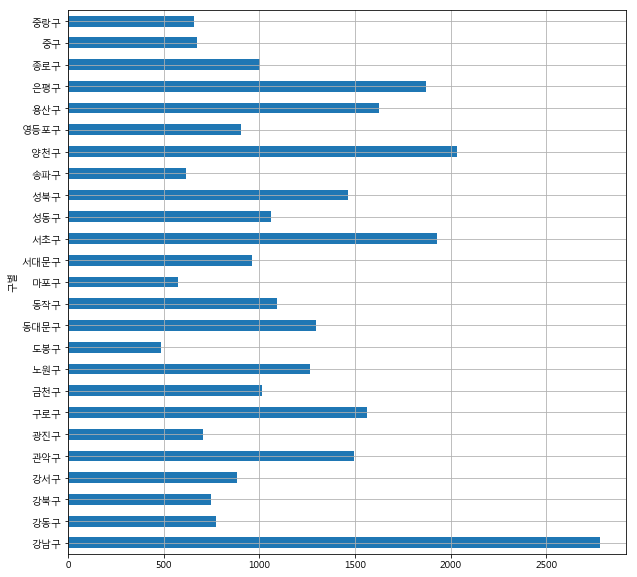

In [44]:
plt.figure()
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

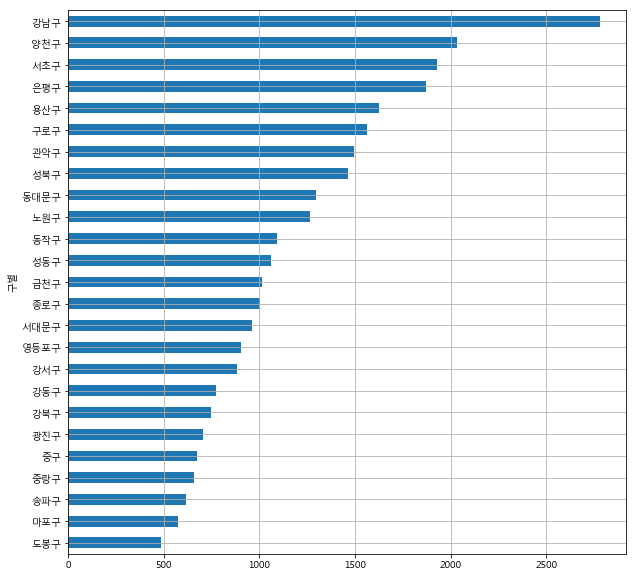

In [45]:
data_result['소계'].sort_values().plot(kind='barh', 
                                     grid=True, figsize=(10,10))
plt.show()

In [46]:
data_result['CCTV비율'] = (data_result['소계'] / data_result['인구수'] * 100).round(2)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,2780,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07,0.49
강동구,773,166.49,453233.0,449019.0,4214.0,54622.0,0.93,12.05,0.17
강북구,748,125.20,330192.0,326686.0,3506.0,54813.0,1.06,16.60,0.23
강서구,884,134.79,603772.0,597248.0,6524.0,72548.0,1.08,12.02,0.15
관악구,1496,149.29,525515.0,507203.0,18312.0,68082.0,3.48,12.96,0.28


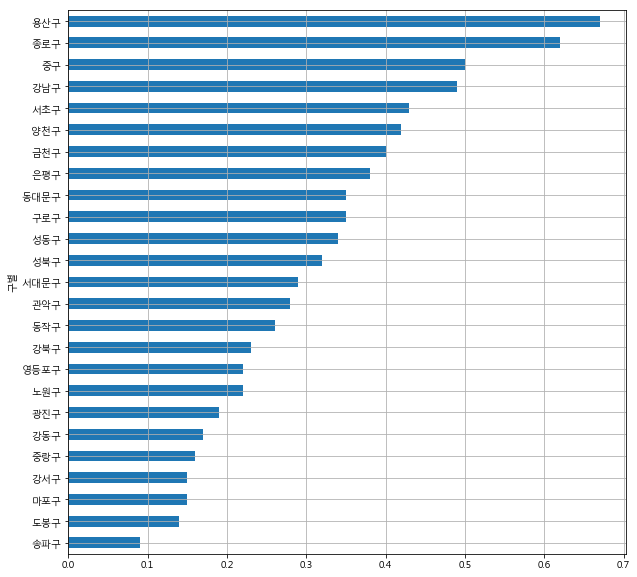

In [47]:
data_result['CCTV비율'].sort_values().plot(kind='barh', 
                                         grid=True, figsize=(10,10))
plt.show()

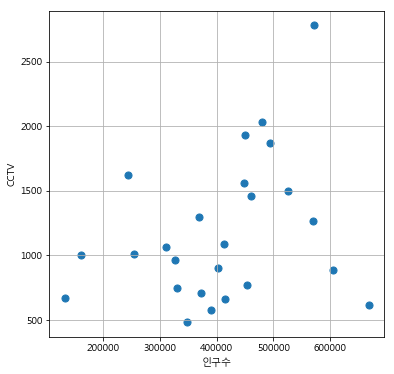

In [48]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [49]:
# 선형 회귀식
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [50]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

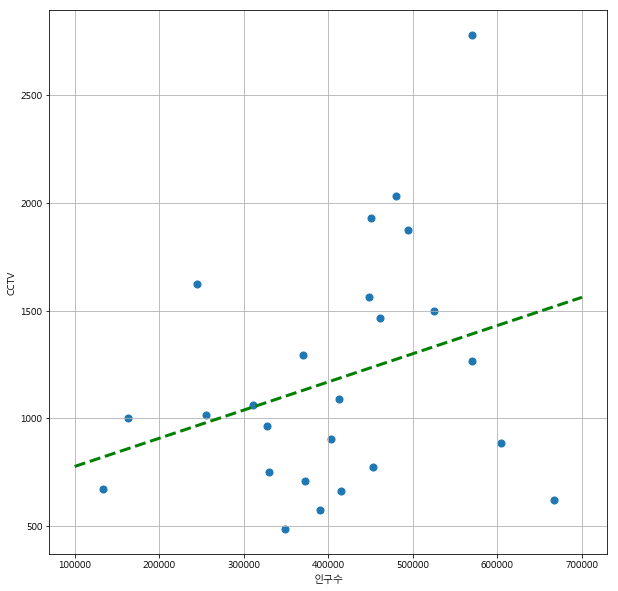

In [51]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

- 조금더 설득력 있는 자료 만들기

In [53]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수'])).round(2)

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07,0.49,1388.06
송파구,618,104.35,667483.0,660584.0,6899.0,72506.0,1.03,10.86,0.09,900.91
양천구,2034,34.67,479978.0,475949.0,4029.0,52975.0,0.84,11.04,0.42,760.56
서초구,1930,63.37,450310.0,445994.0,4316.0,51733.0,0.96,11.49,0.43,695.40
용산구,1624,53.22,244203.0,229456.0,14747.0,36231.0,6.04,14.84,0.67,659.23


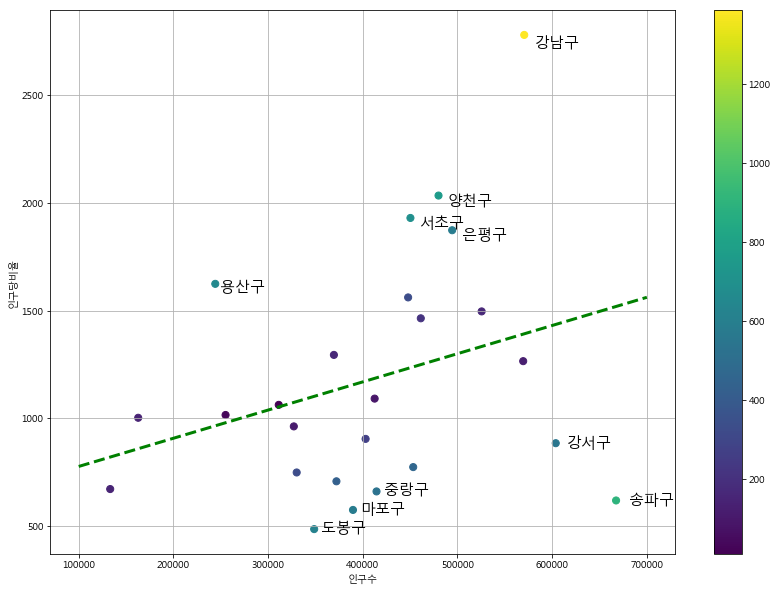

In [54]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()